In [8]:
#import required libraries
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [9]:
import os
os.listdir('C:/Users/ahmee/Desktop/raster')


['2y',
 'Ekran Alıntısı.JPG',
 'Ekran Alıntısı_1.JPG',
 'ndviImage.tiff',
 'ndviImage_1.tiff',
 'subset_0_of_S2A_MSIL1C_20180813T084601_N0206_R107_T35TPE_20180813T115419_resampled_B4.tif',
 'subset_0_of_S2A_MSIL1C_20180813T084601_N0206_R107_T35TPE_20180813T115419_resampled_B8.tif',
 'subset_B4.tif',
 'subset_B8.tif']

In [10]:
band4= rasterio.open('C:/Users/ahmee/Desktop/raster/subset_0_of_S2A_MSIL1C_20180813T084601_N0206_R107_T35TPE_20180813T115419_resampled_B4.tif') #red #year2018
band8= rasterio.open('C:/Users/ahmee/Desktop/raster/subset_0_of_S2A_MSIL1C_20180813T084601_N0206_R107_T35TPE_20180813T115419_resampled_B8.tif') #nir #year2018
band4_1= rasterio.open('C:/Users/ahmee/Desktop/raster/subset_B4.tif') #year2020
band8_1= rasterio.open('C:/Users/ahmee/Desktop/raster/subset_B8.tif') #year2020

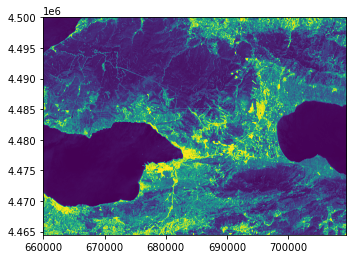

C:\Users\ahmee\anaconda3\envs\ua\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


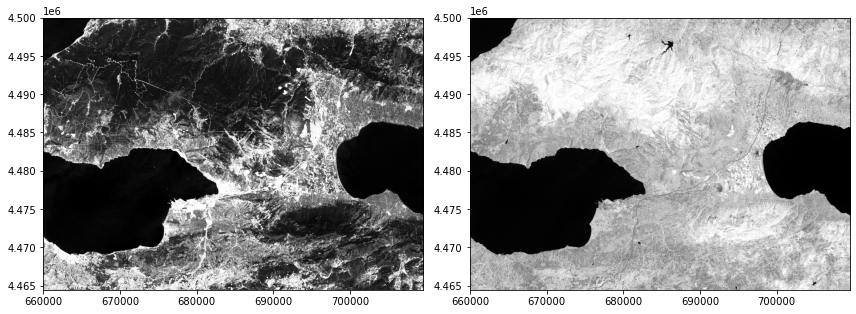

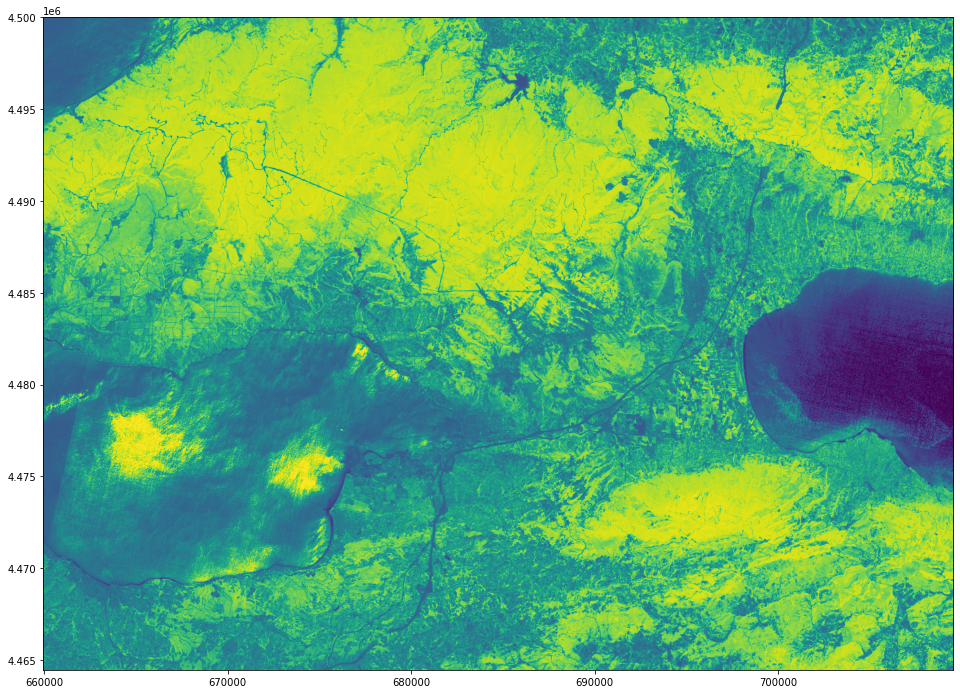

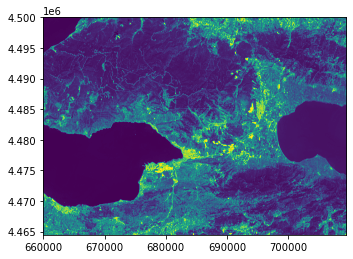

C:\Users\ahmee\anaconda3\envs\ua\lib\site-packages\ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in true_divide


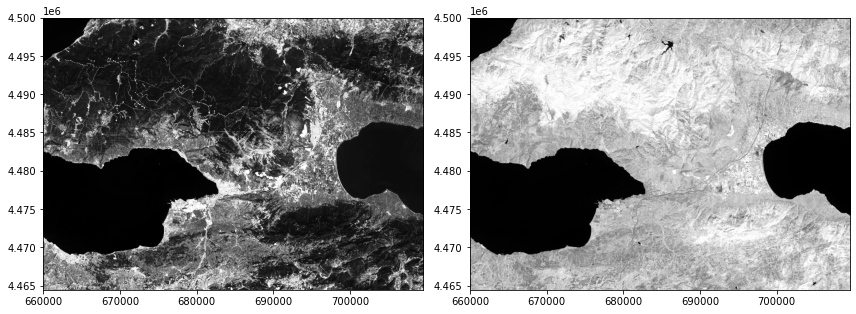

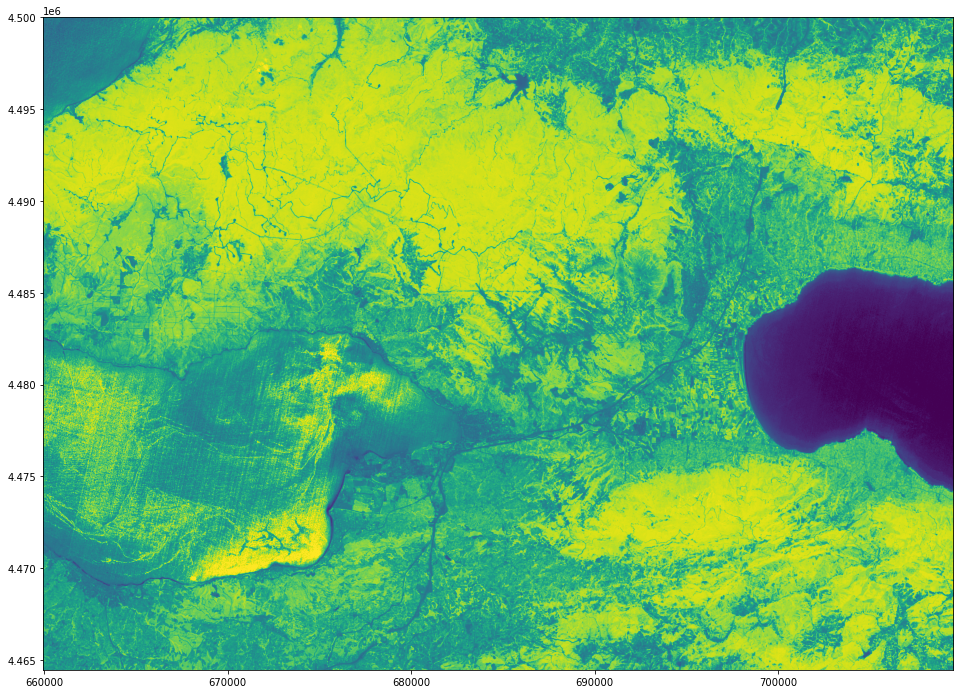

<AxesSubplot:>

In [16]:
#number of raster rows
band4.height
#number of raster columns
band4.width
#plot band 
plot.show(band4)
#type of raster byte
band4.dtypes[0]
#raster sytem of reference
band4.crs
#raster transform parameters
band4.transform
#raster values as matrix array
band4.read(1)
#multiple band representation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot.show(band4, ax=ax1, cmap='Greys_r') #red
plot.show(band8, ax=ax2, cmap='Greys_r') #nir
fig.tight_layout()
#generate nir and red objects as arrays in float64 format
red = band4.read(1).astype('float64')
nir = band8.read(1).astype('float64')

nir
#ndvi calculation, empty cells or nodata cells are reported as 0
ndvi=np.where(
    (nir+red)==0., 
    0, 
    (nir-red)/(nir+red))
ndvi[:5,:5]
#export ndvi image
ndviImage = rasterio.open('C:/Users/ahmee/Desktop/raster/ndviImage.tiff','w',driver='Gtiff',
                          width=band4.width, 
                          height = band4.height, 
                          count=1, crs=band4.crs, 
                          transform=band4.transform, 
                          dtype='float64')
ndviImage.write(ndvi,1)
ndviImage.close()
#plot ndvi
ndvi = rasterio.open('C:/Users/ahmee/Desktop/raster/ndviImage.tiff')
fig = plt.figure(figsize=(18,12))
plot.show(ndvi) # ndvi image of year 2018

#number of raster rows
band4_1.height
#number of raster columns
band4_1.width
#plot band 
plot.show(band4_1)
#type of raster byte
band4_1.dtypes[0]
#raster sytem of reference
band4_1.crs
#raster transform parameters
band4_1.transform
#raster values as matrix array
band4_1.read(1)
#multiple band representation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot.show(band4_1, ax=ax1, cmap='Greys_r') #red
plot.show(band8_1, ax=ax2, cmap='Greys_r') #nir
fig.tight_layout()
#generate nir and red objects as arrays in float64 format
red_1 = band4_1.read(1).astype('float64')
nir_1 = band8_1.read(1).astype('float64')

nir
#ndvi calculation, empty cells or nodata cells are reported as 0
ndvi_1=np.where(
    (nir_1+red_1)==0., 
    0, 
    (nir_1-red_1)/(nir_1+red_1))
ndvi_1[:5,:5]
#export ndvi image
ndviImage_1 = rasterio.open('C:/Users/ahmee/Desktop/raster/ndviImage_1.tiff','w',driver='Gtiff',
                          width=band4_1.width, 
                          height= band4_1.height, 
                          count=1, crs=band4_1.crs, 
                          transform=band4_1.transform, 
                          dtype='float64')
ndviImage_1.write(ndvi_1,1)
ndviImage_1.close()
#plot ndvi
ndvi_1 = rasterio.open('C:/Users/ahmee/Desktop/raster/ndviImage_1.tiff')
fig_1 = plt.figure(figsize=(18,12))
plot.show(ndvi_1)


# 